/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


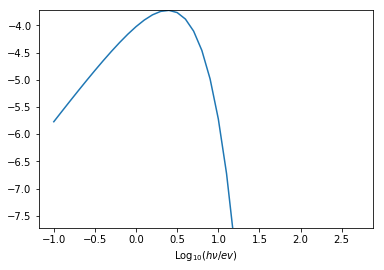

In [38]:
import numpy as np
from matplotlib import pyplot as p

hcont=6.625e-27
scont=5.6704e-5
ccont=3.0e10
kcont=1.381e-16
rcont=8.314472e7
Gcont=6.67e-8
Msun=1.989e33
Lsun=3.827e33
rsun=6.96e10
yr=365.*24.*3600
pi=3.1415926
au=1.49598e13
pc=3.085678e18
ev=1.6022e-12

def BlackbodyBnu(Temperature, nu):
    return 2.*hcont*nu**3/ccont**2/(np.exp(hcont*nu/kcont/Temperature)-1)

hnu=10.**np.arange(-1,4,0.1)*ev 

# white dwarf a single blackbody at 1e4 K

Bnu=np.array(hnu.size)
Temperature=1.e4

Bnu=BlackbodyBnu(Temperature,hnu/hcont)

p.plot(np.log10(hnu/ev),np.log10(Bnu))
p.ylim(np.log10(Bnu.max())-4.,np.log10(Bnu.max()))
p.xlabel(r'Log$_{10}(h\nu/ev)$')
p.show()

# Question 1, what is the spectrum (Flux(pi*intensity) integrated over area) from the white dwarf 
# assuming the radius of the white dwarf is 10^4 km?

# Question 2, We have an accretion disk around the white dwarf accreting at 10^{-9} Msun/year, what is the spectrum? 
# The accretion disk extends from white dwarf  surface to 100 white dwarf surface. The white dwarf mass is one solar mass

# Question 3, Now we have an accretion disk around the neutron star, accreting at the same rate, what is the spectrum?

# Question 4, Now we have an accreiotn disk around a solar mass blackhole. 
# For a non-rotating blackhole, the innermost stable orbit is 3 rs, For a maximum prograte spinning black hole, 
# the inner most stable orbit is 0.5 rs. For a maximum retrograte spinning blackhole, the innermost orbit is
# 4.5 rs. Calculate the spectra for these three cases

[6.68291877e+013 1.04303935e+014 1.62129839e+014 2.50707311e+014
 3.85110419e+014 5.86547016e+014 8.83597697e+014 1.31231538e+015
 1.91334267e+015 2.72287612e+015 3.75305395e+015 4.95797592e+015
 6.18839685e+015 7.15761287e+015 7.47335688e+015 6.80473246e+015
 5.16821045e+015 3.09710529e+015 1.36801237e+015 4.09911242e+014
 7.52244223e+013 7.44288110e+012 3.38321165e+011 5.77637408e+009
 2.87480343e+007 3.03086046e+004 4.52912414e+000 5.78432025e-005
 3.33959266e-011 3.90962972e-019 3.38234767e-029 6.06845610e-042
 4.55995968e-058 1.91523680e-078 3.56246755e-104 1.20594857e-136
 1.33601586e-177 3.07746178e-229 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


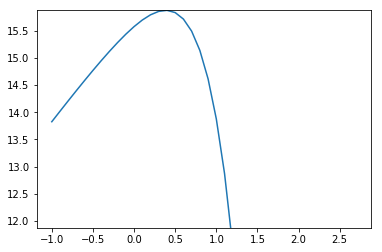

In [39]:
2.8*kcont*Temperature/ev

#Question 1

flux=pi*Bnu
R=10**4*10**5
SED=4*pi*R**2*flux
print(SED)
p.plot(np.log10(hnu/ev),np.log10(SED))
p.ylim(np.log10(SED.max())-4.,np.log10(SED.max()))
p.show()

/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


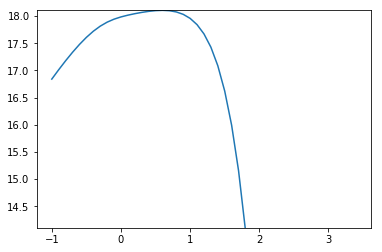

/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10


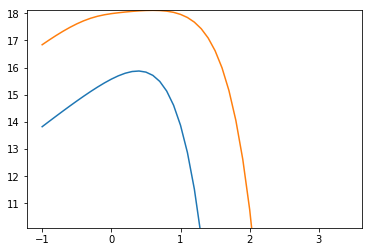

In [40]:
# Question 2
# Accretion Disk around White Drawf
radii=np.arange(R,100*R,0.1*R)
#print(radii)
accrate=10**-9*Msun/yr
Temps=((Gcont*Msun*accrate)/(8*pi*scont))**(0.25)*radii**(-3.0/4.0)
Bnu2=np.zeros(shape=(len(radii),50))

for i in range(len(Temps)):
    Bnu2[i]=BlackbodyBnu(Temps[i],hnu/hcont)
#Temps[0]=0.
#print(Temps)

SED2=np.zeros(len(Bnu2[0]))

#Bnu2[0]=[0]
#print(Bnu2)

for i in range(len(Bnu2[0])):
    sums=0
    for j in range(len(radii)):
        sums=sums+2*pi*Bnu2[j][i]*2*pi*radii[j]*0.1*R
    SED2[i]=sums

    
#    
#SED2=0    
#for i in len(radii):
#    SED2=SED2+2*Temps[i]*i*2*pi*radii[i]*0.1*R

#print(SED2)
p.plot(np.log10(hnu/ev),np.log10(SED2))
p.ylim(np.log10(SED2.max())-4.,np.log10(SED2.max()))
p.show()

p.plot(np.log10(hnu/ev),np.log10(SED))
#p.ylim(np.log10(SED.max())-4.,np.log10(SED.max()))
p.plot(np.log10(hnu/ev),np.log10(SED2))
p.ylim(np.log10(SED2.max())-8.,np.log10(SED2.max()))
p.show()

/home/davidr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


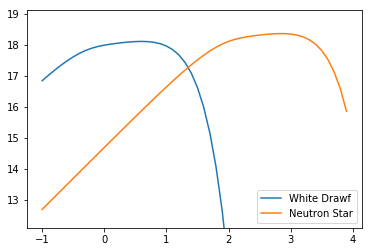

In [42]:
#Question 3
#Accretion Neutron Star
R=10*10**5
radii=np.arange(R,100*R,0.1*R)
#print(radii)
accrate=10**-9*Msun/yr
Temps=((Gcont*Msun*accrate)/(8*pi*scont))**(0.25)*radii**(-3.0/4.0)
Bnu2=np.zeros(shape=(len(radii),50))

for i in range(len(Temps)):
    Bnu2[i]=BlackbodyBnu(Temps[i],hnu/hcont)
#Temps[0]=0.
#print(Temps)

SED3=np.zeros(len(Bnu2[0]))

#Bnu2[0]=[0]
#print(Bnu2)

for i in range(len(Bnu2[0])):
    sums=0
    for j in range(len(radii)):
        sums=sums+2*Bnu2[j][i]*2*pi*radii[j]*0.1*R
    SED3[i]=sums

    
#    
#SED2=0    
#for i in len(radii):
#    SED2=SED2+2*Temps[i]*i*2*pi*radii[i]*0.1*R

#print(SED2)
p.plot(np.log10(hnu/ev),np.log10(SED2),label='White Drawf')
p.plot(np.log10(hnu/ev),np.log10(SED3),label='Neutron Star')
p.legend()
p.ylim(np.log10(SED2.max())-6.,np.log10(SED2.max())+1)
p.show()

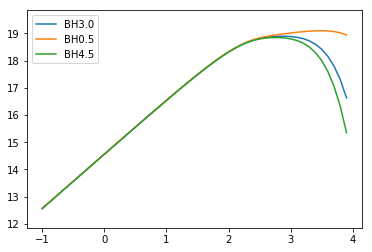

In [46]:
#Question 4
#3rs 0.5rs 4.5rs

Rs=2*Gcont*Msun/ccont**2
for h in [3.,0.5,4.5]:
    radii=np.arange(h*Rs,100*Rs,0.1*Rs)
    #print(radii)
    accrate=10**-9*Msun/yr
    Temps=((Gcont*Msun*accrate)/(8*pi*scont))**(0.25)*radii**(-3.0/4.0)
    Bnu2=np.zeros(shape=(len(radii),50))

    for i in range(len(Temps)):
        Bnu2[i]=BlackbodyBnu(Temps[i],hnu/hcont)

    SED2=np.zeros(len(Bnu2[0]))

    for i in range(len(Bnu2[0])):
        sums=0
        for j in range(len(radii)):
            sums=sums+2*Bnu2[j][i]*2*pi*radii[j]*0.1*R
        SED2[i]=sums

    p.plot(np.log10(hnu/ev),np.log10(SED2),label='BH'+str(h))
    p.ylim(np.log10(SED2.max())-7.,np.log10(SED2.max())+1)
p.legend()
p.show()